# Load the CSV file into a Pandas DataFrame

In [1]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import matplotlib.pyplot as plt
import numpy as np
essay_ids = range(1,7)
threshold=1
data_path = "asap-aes/"
org = pd.read_excel(data_path+"training_set_rel3.xlsx")
domains = ['domain1', 'domain2']

In [2]:
def read_set(essay_id):
    df = pd.read_csv(data_path+"results_gpt/EssaySet"+str(essay_id)+"_assessment_results_by_rubric.csv")
    if essay_id==1:
        df['domain1_score']= df['domain1_score']//2
        df['domain1_score'].head(5)
    return df

# Data visualization CM

In [3]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# # Load the CSV file
# data = read_set(1)
# data.dropna(subset=['domain1_Score_gpt'], inplace=True)
# data.dropna(subset=['domain1_score'], inplace=True)
# # Extract the actual and predicted scores
# actual_scores = df['domain1_score'].astype(int).tolist()
# predicted_scores = df['domain1_Score_gpt'].astype(int).tolist()

# # Define the score ranges
# score_range = range(data[['domain1_score']].astype(int).min()[0], data[['domain1_score']].astype(int).max()[0]+1)  # Assuming scores from 0 to 5
# print(score_range)
# # Create the confusion matrix
# confusion_mat = confusion_matrix(actual_scores, predicted_scores, labels=score_range)

# # Create a DataFrame for the confusion matrix
# confusion_df = pd.DataFrame(confusion_mat, index=score_range, columns=score_range)

# # Display the confusion matrix table
# print("Confusion Matrix:")
# print(confusion_df)


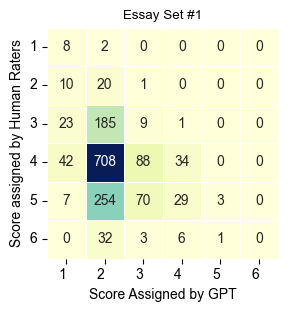

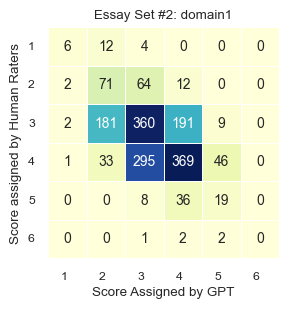

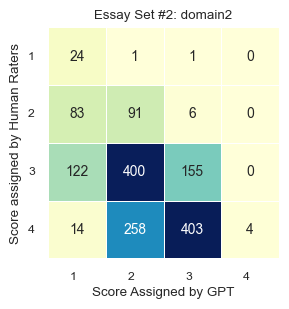

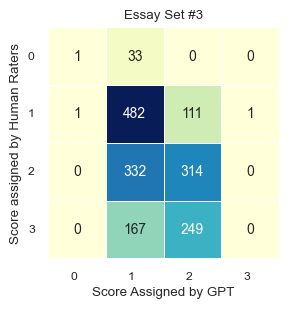

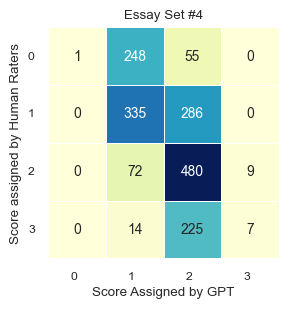

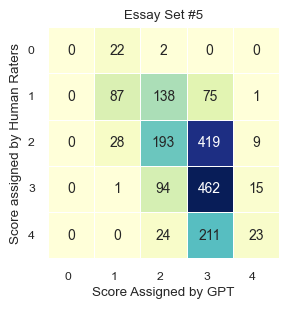

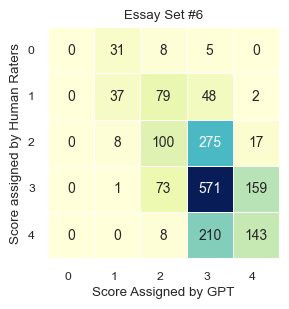

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            # Assuming you have the actual and predicted scores in two lists or arrays
            # Assuming you have the actual and predicted scores in two lists or arrays
            actual_scores = df[domain+'_score'].astype(int).tolist()
            predicted_scores = df[domain+'_Score_gpt'].astype(int).tolist()
            # Modify predicted scores to have a single class for scores greater than 6
            m_predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]

            # Define the unique labels in the score range
            score_labels = sorted(set(actual_scores + m_predicted_scores))

            # Create the confusion matrix
            cm = confusion_matrix(actual_scores, m_predicted_scores, labels=score_labels)

            # Create a DataFrame for the confusion matrix
            cm_df = pd.DataFrame(cm, index=score_labels, columns=score_labels)

            # Set up the figure and axis
            fig, ax = plt.subplots(figsize=(4, 3))
            sns.set(font_scale=0.8)

            # Create a heatmap with white background
            sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}, cbar=False, linewidths=0.5, square=True, ax=ax)

            # Set labels and title
            ax.set_xlabel('Score Assigned by GPT')
            ax.set_ylabel('Score assigned by Human Raters')
            if (essay_id!=2):
                ax.set_title("Essay Set #"+str(essay_id))
            else:
                ax.set_title("Essay Set #"+str(essay_id)+": "+domain)
                
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"

            # Rotate the tick labels for better readability if needed
            plt.xticks(rotation=0, ha='right')
            plt.yticks(rotation=0)
            plt.savefig(graph_path+"cm.png", bbox_inches='tight')

            # Show the plot
            plt.show()


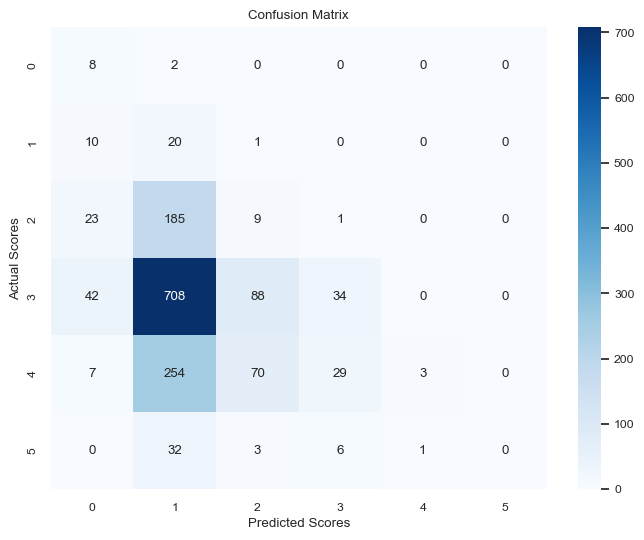

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
df = read_set(1)
df.dropna(subset=['domain1_Score_gpt'], inplace=True)
df.dropna(subset=['domain1_score'], inplace=True)
# Assuming you have the actual and predicted scores in two lists or arrays
# Assuming you have the actual and predicted scores in two lists or arrays
actual_scores = df['domain1_score'].astype(int).tolist()
predicted_scores = df['domain1_Score_gpt'].astype(int).tolist()

# Modify predicted scores to have a single class for scores greater than 6
modified_predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]

# Step 2: Compute the confusion matrix
cm = confusion_matrix(actual_scores, modified_predicted_scores)

# Step 3: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Scores')
plt.ylabel('Actual Scores')
plt.show()

# point 1 Confusion matrix variation 

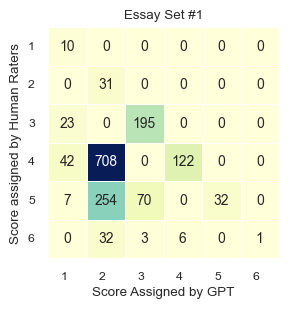

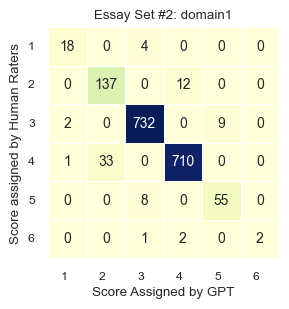

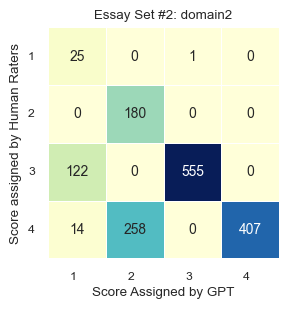

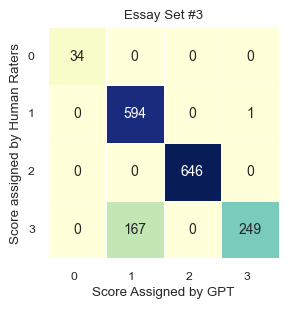

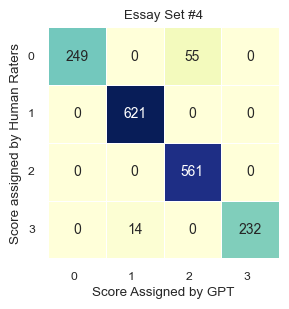

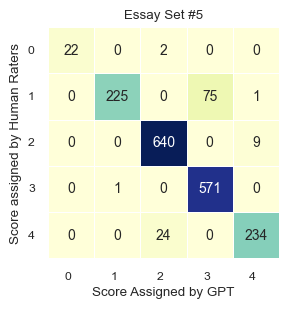

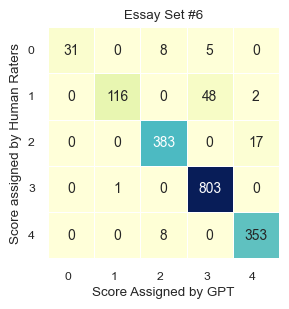

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

for essay_id in essay_ids:
    df = read_set(essay_id)
    for domain in domains:
        # domain = "Language Convensions"
        # Extract the actual and predicted scores as NumPy arrays
        if domain+'_Score_gpt' in df.columns:
            df.dropna(subset=[domain+'_Score_gpt'], inplace=True)
            df.dropna(subset=[domain+'_score'], inplace=True)
            # Assuming you have the actual and predicted scores in two lists or arrays
            actual_scores = df[domain+'_score'].astype(int).tolist()
            predicted_scores = df[domain+'_Score_gpt'].astype(int).tolist()
            predicted_scores = [score//4 if score > 6 else score for score in predicted_scores]
            # Define the acceptable range for score variation
            acceptable_range = 1

            # Group the scores within the acceptable range
            actual_scores_grouped = actual_scores
            predicted_scores_grouped = [score if abs(score - pred_score) <= acceptable_range else pred_score
                                        for score, pred_score in zip(actual_scores, predicted_scores)]

            # Define the unique labels in the grouped score range
            score_labels_grouped = sorted(set(actual_scores_grouped + predicted_scores_grouped))

            # Create the confusion matrix
            cm = confusion_matrix(actual_scores_grouped, predicted_scores_grouped, labels=score_labels_grouped)

            # Create a DataFrame for the confusion matrix
            cm_df = pd.DataFrame(cm, index=score_labels_grouped, columns=score_labels_grouped)

            # Set up the figure and axis
            fig, ax = plt.subplots(figsize=(4, 3))
            sns.set(font_scale=0.8)

            # Create a heatmap with white background
            sns.heatmap(cm_df, annot=True, cmap='YlGnBu', fmt='d', annot_kws={"size": 10}, cbar=False, linewidths=0.5, square=True, ax=ax)

            # Set labels and title
            ax.set_xlabel('Score Assigned by GPT')
            ax.set_ylabel('Score assigned by Human Raters')
            if (essay_id!=2):
                ax.set_title("Essay Set #"+str(essay_id))
            else:
                ax.set_title("Essay Set #"+str(essay_id)+": "+domain)
                
            graph_path = data_path+"reports_graphs/EssaySet"+str(essay_id)+"_"+domain+"_"

            # Rotate the tick labels for better readability if needed
            plt.xticks(rotation=0, ha='right')
            plt.yticks(rotation=0)
            plt.savefig(graph_path+"cm_point1.png", bbox_inches='tight')
            # Show the plot
            plt.show()